# GNN Visuals

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import math

In [2]:
# Example Model Parameters
in_channels = 16   # Number of input feature channels per node
out_channels = 32  # Number of output feature channels per node
num_directions = 24 # Number of possible directions (E, NE, N, NW, W, SW, S, SE)

# Calculate the number of weight parameters per direction
weights_per_direction = 6
bias_per_direction = 6  # Assuming one bias per output channel
total_weights_per_direction = weights_per_direction + bias_per_direction

print(f"Weight Parameters per Direction: {weights_per_direction}")
print(f"Bias Parameters per Direction: {bias_per_direction}")
print(f"Total Parameters per Direction: {total_weights_per_direction}")

Weight Parameters per Direction: 6
Bias Parameters per Direction: 6
Total Parameters per Direction: 12


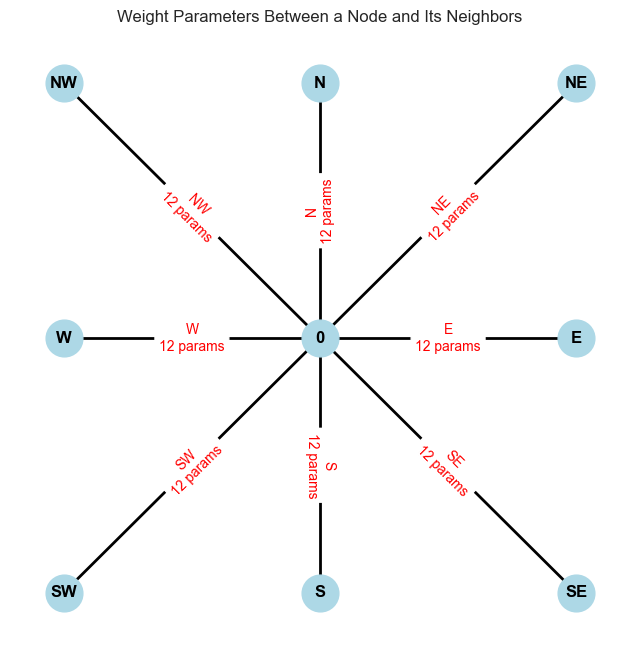

In [3]:
def create_single_node_grid():
    """
    Creates a subgraph with one central node connected to its 8 immediate neighbors.
    
    Returns:
        G (networkx.Graph): The created subgraph.
        edge_info (dict): Dictionary mapping edges to their directions.
    """
    G = nx.Graph()
    
    # Define central node
    central_node = 0
    G.add_node(central_node, pos=(0, 0))
    
    # Define directions with their corresponding offsets
    directions = {
        'E': (1, 0),
        'NE': (1, 1),
        'N': (0, 1),
        'NW': (-1, 1),
        'W': (-1, 0),
        'SW': (-1, -1),
        'S': (0, -1),
        'SE': (1, -1)
    }
    
    edge_info = {}
    
    # Add neighbor nodes and edges with direction attributes
    for dir_name, (dx, dy) in directions.items():
        neighbor = dir_name  # Using direction name as neighbor identifier
        G.add_node(neighbor, pos=(dx, dy))
        G.add_edge(central_node, neighbor, direction=dir_name)
        edge_info[(central_node, neighbor)] = dir_name
    
    return G, edge_info

# Create the subgraph
G, edge_info = create_single_node_grid()


def visualize_weight_parameters(G, edge_info, weights_per_direction):
    """
    Visualizes the subgraph with edges annotated by the number of weight parameters.
    
    Args:
        G (networkx.Graph): The subgraph.
        edge_info (dict): Dictionary mapping edges to their directions.
        weights_per_direction (int): Number of weight parameters per direction.
    """
    pos = nx.get_node_attributes(G, 'pos')
    
    plt.figure(figsize=(8, 8))
    sns.set_style("whitegrid")
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2)
    
    # Draw labels for nodes
    labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=12, font_weight='bold')
    
    # Annotate edges with the number of weight parameters
    edge_labels = {}
    for edge in G.edges():
        direction = edge_info[edge]
        edge_labels[edge] = f"{direction}\n{weights_per_direction} params"
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')
    
    plt.title("Weight Parameters Between a Node and Its Neighbors")
    plt.axis('off')
    plt.show()

# Visualize the subgraph
visualize_weight_parameters(G, edge_info, total_weights_per_direction)
